In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
# Read the CSV file
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory = False)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [2]:
num_missing = df.isna().sum()

print(num_missing)

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [3]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [4]:
# Replace '?' with NaN
df['Sub_metering_1'] = df['Sub_metering_1'].replace('?', np.nan)
df['Sub_metering_2'] = df['Sub_metering_2'].replace('?', np.nan)
df['Global_active_power'] = df['Global_active_power'].replace('?', np.nan)
df['Global_reactive_power'] = df['Global_reactive_power'].replace('?', np.nan)
df['Voltage'] = df['Voltage'].replace('?', np.nan)
df['Global_intensity'] = df['Global_intensity'].replace('?', np.nan)



# Then convert the column to 'float64'
df['Sub_metering_1'] = df['Sub_metering_1'].astype('float64')
df['Sub_metering_2'] = df['Sub_metering_2'].astype('float64')
df['Global_active_power'] = df['Global_active_power'].astype('float64')
df['Global_reactive_power'] = df['Global_reactive_power'].astype('float64')
df['Voltage'] = df['Voltage'].astype('float64')
df['Global_intensity'] = df['Global_intensity'].astype('float64')



df.dtypes



Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [5]:
import pandas as pd

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [6]:
df['Total_Usage'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Usage
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0
...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,0.0


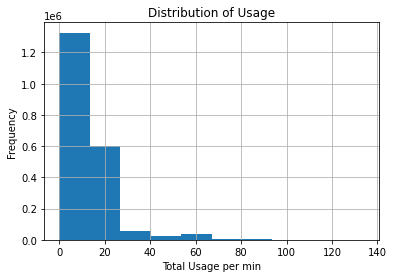

In [7]:
import matplotlib.pyplot as plt
# create a histogram of the usage column
df['Total_Usage'].hist()

# set the title and labels of the plot
plt.title('Distribution of Usage')
plt.xlabel('Total Usage per min')
plt.ylabel('Frequency')

plt.show()

In [8]:
column_sum1 = df['Sub_metering_1'].sum() # 2.299.135
column_sum2 = df['Sub_metering_2'].sum() # 2.661.031
column_sum3 = df['Sub_metering_3'].sum() # 13.235.167
column_sum1_m = df['Sub_metering_1'].mean() # 2.299.135
column_sum2_m = df['Sub_metering_2'].mean() # 2.661.031
column_sum3_m = df['Sub_metering_3'].mean() # 13.235.167

print(column_sum1, column_sum2, column_sum3)

2299135.0 2661031.0 13235167.0


In [9]:
print(column_sum1_m, column_sum2_m, column_sum3_m)

1.1219233096502186 1.2985199679887571 6.45844735712055


In [10]:
# This function has no use for our final model anymore

# Function to map time to 
def map_to_twelfth(time):
    hour = int(time.split(':')[0])
    if 0 <= hour <= 1:
        return 'Q1'
    elif 2 <= hour <= 3:
        return 'Q2'
    elif 4 <= hour <= 5:
        return 'Q3'
    elif 6 <= hour <= 7:
        return 'Q4'
    elif 8 <= hour <= 9:
        return 'Q5'
    elif 10 <= hour <= 11:
        return 'Q6'
    elif 12 <= hour <= 13:
        return 'Q7'
    elif 14 <= hour <= 15:
        return 'Q8'
    elif 16 <= hour <= 17:
        return 'Q9'
    elif 18 <= hour <= 19:
        return 'Q10'
    elif 20 <= hour <= 21:
        return 'Q11'
    elif 22 <= hour <= 23:
        return 'Q12'
   
    else:
        return None

# Apply the mapping function to create the "Quarter" column
df['zwoelftel'] = df['Time'].apply(map_to_twelfth)

In [11]:
# Function to map time to quarters
def map_to_quarters(time):
    hour = int(time.split(':')[0])
    if 0 <= hour <= 5:
        return 'Q1'
    elif 6 <= hour <= 11:
        return 'Q2'
    elif 12 <= hour <= 17:
        return 'Q3'
    elif 18 <= hour <= 23:
        return 'Q4'
    else:
        return None

# Apply the mapping function to create the "Quarter" column
df['Quarter'] = df['Time'].apply(map_to_quarters)

In [12]:
# Function to map time to day and night
def day_and_night(time):
    hour = int(time.split(':')[0])
    if 22 <= hour <= 23:
        return 'night'
    elif 0 <= hour <= 7:
        return 'night'
    elif 8 <= hour <= 21:
        return 'day'
    else:
        return None

# Apply the mapping function to create the "Quarter" column
df['day_night'] = df['Time'].apply(day_and_night)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Usage,zwoelftel,Quarter,day_night
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0,Q9,Q3,day
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0,Q9,Q3,day
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0,Q9,Q3,day
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0,Q9,Q3,day
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0,Q9,Q3,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,0.0,Q11,Q4,day
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,0.0,Q11,Q4,day
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,0.0,Q11,Q4,day
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,0.0,Q11,Q4,day


# Aproach 
 
- EMS predicting sub metering 1-3 classification (by predicting the specific sub metering by usage) --> actual data as input
- predicting USAGE for upcoming years (Forecast) (Regression)
- predicting USAGE for timestamps (Classification) morning noon etc.


In [13]:
df.dropna(inplace=True)

In [14]:
df.dtypes
num_missing2 = df.isna().sum()

print(num_missing2)

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Total_Usage              0
zwoelftel                0
Quarter                  0
day_night                0
dtype: int64


In [15]:
quarterly_mean = df.groupby('zwoelftel')['Total_Usage'].mean()
print(quarterly_mean)

zwoelftel
Q1      3.442769
Q10    10.175740
Q11    12.668449
Q12     7.448651
Q2      2.316544
Q3      2.367265
Q4      8.081968
Q5     15.067815
Q6     13.928937
Q7     12.384332
Q8     10.521709
Q9      8.152242
Name: Total_Usage, dtype: float64


In [16]:
# Not needed anymore

# Mapping function to aggregate string values
def aggregate_quarters(quarter):
    if quarter in ['Q1', 'Q2', 'Q3']:
        return 'very_low'
    elif quarter in ['Q4', 'Q9', 'Q12']:
        return 'low'
    elif quarter in ['Q8', 'Q10', 'Q11']:
        return 'medium'
    elif quarter in ['Q5', 'Q6', 'Q7']:
        return 'high'
    else:
        return None

# Apply the mapping function to create the aggregated column
df['Aggregated_Levels'] = df['zwoelftel'].apply(aggregate_quarters)

### Further statistics

In [17]:
quarterly_mean = df.groupby('Aggregated_Levels')['Sub_metering_1'].mean()

print(quarterly_mean)

Aggregated_Levels
high        1.387774
low         0.867809
medium      2.079855
very_low    0.151723
Name: Sub_metering_1, dtype: float64


In [18]:
quarterly_mean = df.groupby('Aggregated_Levels')['Sub_metering_2'].mean()

print(quarterly_mean)

Aggregated_Levels
high        1.685247
low         1.103163
medium      2.021554
very_low    0.383936
Name: Sub_metering_2, dtype: float64


In [19]:
quarterly_mean = df.groupby('Aggregated_Levels')['Sub_metering_3'].mean()

print(quarterly_mean)

Aggregated_Levels
high        10.720516
low          5.922883
medium       7.021450
very_low     2.173486
Name: Sub_metering_3, dtype: float64


In [20]:
s_df = df[(df['Date'] >= '2007-01-01') & (df['Date'] <= '2009-12-31')] # As mentioned in the report, only taking two years into account 

In [21]:
s_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Usage,zwoelftel,Quarter,day_night,Aggregated_Levels
21996,2007-01-01,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,0.0,Q1,Q1,night,very_low
21997,2007-01-01,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,0.0,Q1,Q1,night,very_low
21998,2007-01-01,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,0.0,Q1,Q1,night,very_low
21999,2007-01-01,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,0.0,Q1,Q1,night,very_low
22000,2007-01-01,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,0.0,Q1,Q1,night,very_low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600231,2009-12-31,23:55:00,1.746,0.158,239.95,7.2,0.0,0.0,18.0,18.0,Q12,Q4,night,low
1600232,2009-12-31,23:56:00,1.786,0.234,240.09,7.4,0.0,0.0,19.0,19.0,Q12,Q4,night,low
1600233,2009-12-31,23:57:00,1.784,0.232,239.99,7.4,0.0,0.0,18.0,18.0,Q12,Q4,night,low
1600234,2009-12-31,23:58:00,1.792,0.236,240.62,7.4,0.0,0.0,18.0,18.0,Q12,Q4,night,low


### Final machine learning model: Binary classification

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Splitting the data into training and testing sets
X = s_df[['Global_active_power']]
y = s_df['day_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.661681195239172
